In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [2]:
import os
import re
import nltk
import spacy
import string
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import spacy
import spacy.displacy

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
os.listdir('/content/drive/MyDrive/Resumes/')

['Peoplesoft resumes',
 'React js Developer',
 'SQL Developer Lightning insight',
 'workday resumes']

In [4]:
pip install textract

Extractng text from Dataset

In [5]:
import os
import textract
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('Peoplesoft resumes')

In [6]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft resumes
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft resumes
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft resumes
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes
7,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft resumes
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft resumes


In [7]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('SQL Developer Lightning insight')

In [8]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning insight
1,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning insight
2,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning insight
3,BUDDHA VAMSI ...,SQL Developer Lightning insight
4,KAMBALLA PRADEEP ...,SQL Developer Lightning insight
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning insight
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning insight
7,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning insight
8,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning insight
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning insight


In [9]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resumes/workday resumes/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append(' workday resumes')

In [10]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,workday resumes
1,Workday HCM Techno functional Consultant ...,workday resumes
2,Vinay kumar .v\nWorkday Functional Consultant\...,workday resumes
3,Name : Gopi Krishna Reddy\n\n\t\t ...,workday resumes
4,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday resumes
5,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes
6,G Himaja\n\n ...,workday resumes
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday resumes
8,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday resumes


In [11]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resumes/React js Developer/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('React js Developer')

In [12]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React js Developer
1,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React js Developer
2,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React js Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React js Developer
4,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React js Developer
5,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React js Developer
6,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React js Developer
7,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React js Developer
8,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React js Developer
9,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React js Developer


Create a DataFrame

In [13]:
# Combining all data points
Resume_data = data1.append([data2, data3, data4], ignore_index = True)
Resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,NaN,NaN,NaN
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft resumes,NaN,NaN,NaN
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft resumes,NaN,NaN,NaN
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft resumes,NaN,NaN,NaN
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,NaN,NaN,NaN
7,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,NaN,NaN,NaN
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft resumes,NaN,NaN,NaN
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft resumes,NaN,NaN,NaN


In [14]:
Resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  51 non-null     object
 1   Category1    10 non-null     object
 2   Category2    11 non-null     object
 3   Category3    11 non-null     object
 4   Category4    19 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


Mergeing all unnecessary column in one Column

---



In [15]:
Resume_data['Category'] = category1 + category2 + category3 + category4
Resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
1,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
5,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
7,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft resumes,NaN,NaN,NaN,Peoplesoft resumes


In [16]:
Resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
Resume_data = Resume_data[["Category", "Raw_Details"]]

In [17]:
Resume_data.head(20)

,Category,Raw_Details
0,Peoplesoft resumes,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft resumes,Classification: Internal\n\nClassification: In...
2,Peoplesoft resumes,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft resumes,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
4,Peoplesoft resumes,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
5,Peoplesoft resumes,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
6,Peoplesoft resumes,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
7,Peoplesoft resumes,PeopleSoft Administration\n\n \n\nVivekanand S...
8,Peoplesoft resumes,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,Peoplesoft resumes,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [18]:
Resume_data["Raw_Details"][8]

'Hari Narayana \t\t              \n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFESSIONAL SUMMARY\n\nHaving 4.6 years of experience in PeopleSoft application enhancement, implementation, Data conversion, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.\n\nSkill\n\n\n\n\n\n\n\nPeople Tools\n\nApplication Designer, Application Engine, People Code, Application Packages\n\nPeopleSoft Application\n\nFSCM and HCM Applications\n\nFSCM Modules\n\nProcurement, PO, AP, AR, Billing and GL\n\nHCM Modules\n\nRecruiting, Performance Management, WAF, Benefits\n\nInterfaces\n\nComponent Interface and File Layout\n\nOther Languages\n\nC, C++\n\nDatabase \n\nOracle, SQL Server, DB2\n\nOperating System\n\nWindows, UNIX\n\n\n\n\n\nEDUCATION\n\n\n\n\n\n\n\nBachelor of Technology (B-Tech) from JNTU-K\n\n\t   Currently Working as a People Soft Consultant in Randstad, Hyderabad\n\n\n\n\n\nRELEVANT EXPERIENCE\n\nPeopleSoft Consultant – Randstad

Saving CSV file

In [19]:
Resume_data.to_csv('Raw_Resume.csv', index=False)

In [20]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,Peoplesoft resumes,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft resumes,Classification: Internal\n\nClassification: In...
2,Peoplesoft resumes,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft resumes,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
4,Peoplesoft resumes,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
5,Peoplesoft resumes,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
6,Peoplesoft resumes,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
7,Peoplesoft resumes,PeopleSoft Administration\n\n \n\nVivekanand S...
8,Peoplesoft resumes,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,Peoplesoft resumes,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [21]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

Number of words in each Resume

In [22]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1008
1,Classification: Internal\n\nClassification: In...,558
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433


Number of Characters

In [23]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,7792
1,Classification: Internal\n\nClassification: In...,4917
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,2852
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669


Number of Stop words

In [24]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,Classification: Internal\n\nClassification: In...,114
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84


Number of Numerics

In [25]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,Classification: Internal\n\nClassification: In...,7
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,4
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13


In [26]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,Peoplesoft resumes,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1008,7792,190,4
1,Peoplesoft resumes,Classification: Internal\n\nClassification: In...,558,4917,114,7
2,Peoplesoft resumes,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
3,Peoplesoft resumes,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
4,Peoplesoft resumes,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
5,Peoplesoft resumes,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
6,Peoplesoft resumes,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
7,Peoplesoft resumes,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
8,Peoplesoft resumes,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
9,Peoplesoft resumes,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3


Text Pre-Processing

In [27]:
# Using Regular Expression
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [28]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [29]:
resume_data

,Category,Raw_Details,Resume_Details
0,Peoplesoft resumes,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,Peoplesoft resumes,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
4,Peoplesoft resumes,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
5,Peoplesoft resumes,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
6,Peoplesoft resumes,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
7,Peoplesoft resumes,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
8,Peoplesoft resumes,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
9,Peoplesoft resumes,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...


In [30]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,tanna sujatha objective seeking challenging ro...
4,Peoplesoft resumes,murali professional summary years experience p...
5,Peoplesoft resumes,address manyata tech park nagavara bangalore l...
6,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
7,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...
8,Peoplesoft resumes,hari narayana professional summary years exper...
9,Peoplesoft resumes,priyabrata hota career objective pursuing peop...


In [31]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [32]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,tanna sujatha objective seeking challenging ro...
4,Peoplesoft resumes,murali professional summary years experience p...
5,Peoplesoft resumes,address manyata tech park nagavara bangalore l...
6,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...
7,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...
8,Peoplesoft resumes,hari narayana professional summary years exper...
9,Peoplesoft resumes,priyabrata hota career objective pursuing peop...


In [33]:
resume_data.Resume_Details[8]

'hari narayana professional summary years experience peoplesoft application enhancement implementation data conversion support upgrade projects well experienced people tools functional knowledge hcm fscm applications skill people tools application designer application engine people code application packages peoplesoft application fscm hcm applications fscm modules procurement billing hcm modules recruiting performance management waf benefits interfaces component interface file layout languages database oracle sql server operating system windows unix education bachelor technology tech jntu currently working people soft consultant randstad hyderabad relevant experience peoplesoft consultant randstad hyderabad andhra pradesh india june till date project randstad enhancements client randstad staffing responsibilities analyze requirement documents understand customer business requirement provide technical approach fdd assign customize system applications designed many objects scratch write 

Named Entity Recognition (NER)

In [34]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 252), ('workday', 232), ('sql', 212), ('application', 207), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 168), ('business', 165), ('web', 144), ('react', 132), ('process', 123), ('skills', 114), ('system', 113), ('knowledge', 113), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('support', 94), ('like', 94), ('developer', 94), ('hcm', 93), ('worked', 93), ('integrations', 92), ('development', 91), ('good', 90), ('technical', 87), ('servers', 85), ('services', 85), ('integration', 84), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('role', 74), ('team', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('professional', 69), ('css', 69)]


Parts of speech (POS)

In [35]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [36]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [37]:
for token in doc_block[:30]:
    print(token,token.pos_)

pplication ADJ
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN
shell NOUN
scripting PROPN
linux PROPN
peoplesoft PROPN
administration PROPN
jenkins PROPN
ansible ADJ
project NOUN
people NOUN
tools NOUN
upgrade VERB
hcm PROPN
application NOUN
upgrade NOUN
project NOUN
migration NOUN
applications VERB
ntt NOUN
cloud ADJ
premises PROPN
aws PROPN
cloud PROPN


Filtering out only Nouns and Verbs from the Token

In [38]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulnerabilities', 'reported', 'security', 'teams', 'vulnerability', 'remediation', 'vulnerability', 'team', 'worked', 'update', 'manager', 'in

Counting all Nouns and Verbs in Token

In [39]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,298
1,using,242
2,application,206
3,workday,193
4,reports,170
5,data,170
6,project,167
7,business,157
8,web,139
9,react,132


Visualizing the top 20 Nouns Verbs from Token

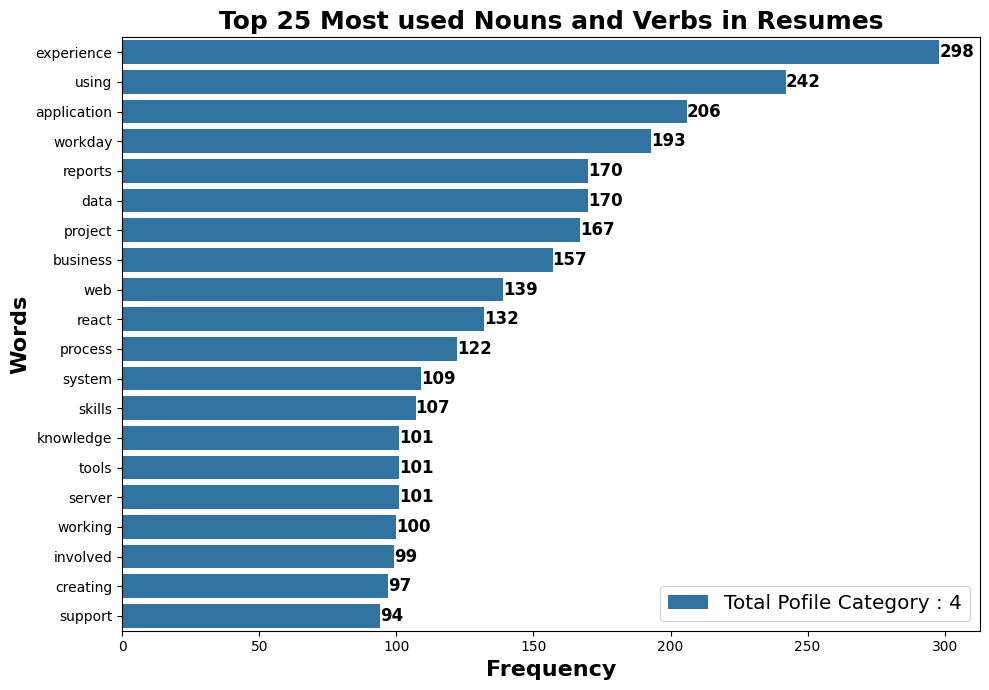

In [40]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=100)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

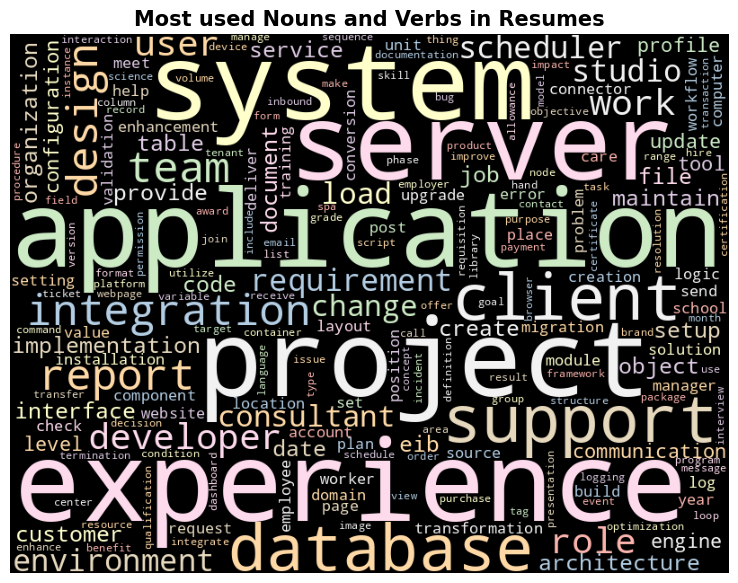

In [41]:
text = " ".join(cat for cat in wd_df.Words)

word_cloud = WordCloud(width=800, height=600, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=100)
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

** Model Building**

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [43]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,classification internal classification interna...
2,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft resumes,tanna sujatha objective seeking challenging ro...
4,Peoplesoft resumes,murali professional summary years experience p...


Data Preprocessing

In [44]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...,1
1,Peoplesoft resumes,classification internal classification interna...,1
2,Peoplesoft resumes,sirazuddin bangalore india sirazuddin bangalor...,1
3,Peoplesoft resumes,tanna sujatha objective seeking challenging ro...,1
4,Peoplesoft resumes,murali professional summary years experience p...,1
5,Peoplesoft resumes,address manyata tech park nagavara bangalore l...,1
6,Peoplesoft resumes,peoplesoft admin varkala vikas career objectiv...,1
7,Peoplesoft resumes,peoplesoft administration vivekanand sayana ca...,1
8,Peoplesoft resumes,hari narayana professional summary years exper...,1
9,Peoplesoft resumes,priyabrata hota career objective pursuing peop...,1


In [45]:
resume_data.describe()

,LebelEncoding
count,51.000000
mean,1.588235
std,1.061630
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


In [46]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

** Train-Test Split**

In [47]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((38,), (13,))

TF - IDF Vectorization (convert text into vectors)




In [49]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [50]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [51]:
x_train.shape, x_test.shape

((38, 2688), (13, 2688))

In [52]:
print(y_train),print(y_test)

['Peoplesoft resumes' 'SQL Developer Lightning insight'
 'React js Developer' 'SQL Developer Lightning insight'
 'React js Developer' ' workday resumes' 'React js Developer'
 ' workday resumes' 'React js Developer' ' workday resumes'
 'Peoplesoft resumes' ' workday resumes' 'Peoplesoft resumes'
 'React js Developer' 'SQL Developer Lightning insight'
 'React js Developer' 'React js Developer' 'Peoplesoft resumes'
 'Peoplesoft resumes' 'React js Developer' ' workday resumes'
 'Peoplesoft resumes' 'React js Developer' ' workday resumes'
 'React js Developer' 'React js Developer'
 'SQL Developer Lightning insight' 'SQL Developer Lightning insight'
 'SQL Developer Lightning insight' 'React js Developer'
 'Peoplesoft resumes' ' workday resumes' ' workday resumes'
 'SQL Developer Lightning insight' 'Peoplesoft resumes'
 'React js Developer' 'SQL Developer Lightning insight'
 'React js Developer']
[' workday resumes' 'Peoplesoft resumes' ' workday resumes'
 'SQL Developer Lightning insight' 'R

(None, None)

**  Classification Models**

In [53]:
# Decision Tree

model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier DecisionTreeClassifier():
                                 precision    recall  f1-score   support

                workday resumes       1.00      1.00      1.00         3
             Peoplesoft resumes       1.00      1.00      1.00         2
             React js Developer       1.00      0.80      0.89         5
SQL Developer Lightning insight       0.75      1.00      0.86         3

                       accuracy                           0.92        13
                      macro avg       0.94      0.95      0.94        13
                   weighted avg       0.94      0.92      0.92        13




In [54]:
# Random Forest Classifier
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                                 precision    recall  f1-score   support

                workday resumes       1.00      1.00      1.00         3
             Peoplesoft resumes       1.00      1.00      1.00         2
             React js Developer       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




In [55]:
# SVM
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85
Classification report for classifier SVC():
                                 precision    recall  f1-score   support

                workday resumes       1.00      1.00      1.00         3
             Peoplesoft resumes       1.00      0.50      0.67         2
             React js Developer       0.71      1.00      0.83         5
SQL Developer Lightning insight       1.00      0.67      0.80         3

                       accuracy                           0.85        13
                      macro avg       0.93      0.79      0.82        13
                   weighted avg       0.89      0.85      0.84        13




In [56]:
# Bagging Classifier

model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                                 precision    recall  f1-score   support

                workday resumes       1.00      1.00      1.00         3
             Peoplesoft resumes       1.00      1.00      1.00         2
             React js Developer       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




In [57]:
# Ada Boost Classifier

model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                                 precision    recall  f1-score   support

                workday resumes       1.00      1.00      1.00         3
             Peoplesoft resumes       1.00      1.00      1.00         2
             React js Developer       1.00      0.80      0.89         5
SQL Developer Lightning insight       0.75      1.00      0.86         3

                       accuracy                           0.92        13
                      macro avg       0.94      0.95      0.94        13
                   weighted avg       0.94      0.92      0.92        13




In [58]:
# Gradient Boosting Classifier

model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                                 precision    recall  f1-score   support

                workday resumes       1.00      1.00      1.00         3
             Peoplesoft resumes       1.00      1.00      1.00         2
             React js Developer       1.00      0.80      0.89         5
SQL Developer Lightning insight       0.75      1.00      0.86         3

                       accuracy                           0.92        13
                      macro avg       0.94      0.95      0.94        13
                   weighted avg       0.94      0.92      0.92        13




In [59]:
# Naive Bayes Classifier

model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                                 precision    recall  f1-score   support

                workday resumes       1.00      1.00      1.00         3
             Peoplesoft resumes       1.00      1.00      1.00         2
             React js Developer       1.00      1.00      1.00         5
SQL Developer Lightning insight       1.00      1.00      1.00         3

                       accuracy                           1.00        13
                      macro avg       1.00      1.00      1.00        13
                   weighted avg       1.00      1.00      1.00        13




** Logistic Regression**

In [60]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85
Classification report for classifier LogisticRegression():
                                 precision    recall  f1-score   support

                workday resumes       1.00      1.00      1.00         3
             Peoplesoft resumes       1.00      0.50      0.67         2
             React js Developer       0.71      1.00      0.83         5
SQL Developer Lightning insight       1.00      0.67      0.80         3

                       accuracy                           0.85        13
                      macro avg       0.93      0.79      0.82        13
                   weighted avg       0.89      0.85      0.84        13




** Model Evaluation**

In [61]:
Evaluation = {"Models":["DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,DecisionTree Classifier,1.0,0.920000,0.94,0.95,0.94
1,RandomForest Classifier,1.0,1.000000,1.00,1.00,1.00
2,SVM Classifier,1.0,0.850000,0.93,0.79,0.82
3,Logistic Regression,1.0,0.850000,0.93,0.79,0.82
4,Bagging Classifier,1.0,1.000000,1.00,1.00,1.00
5,AdaBoost Classifier,1.0,0.920000,0.94,0.95,0.94
6,Gradient Boosting Classifier,1.0,0.923077,0.94,0.95,0.94
7,Naive Bayes Classifier,1.0,1.000000,1.00,1.00,1.00


In [62]:
model_names = ["DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

** Plots for Train - Test Accuracy**

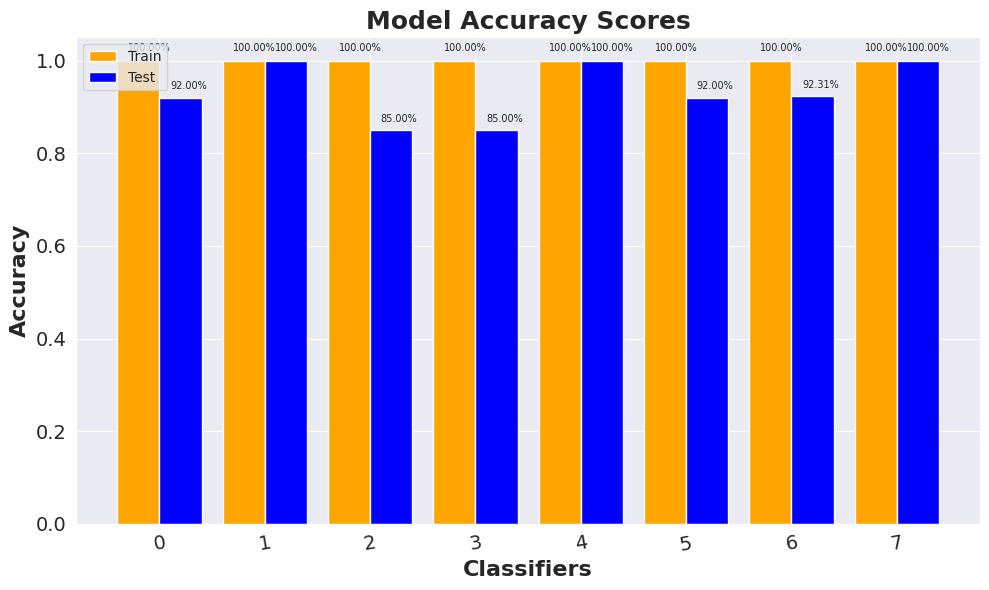

In [63]:
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(10,6), dpi=100)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()